In [192]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [176]:
car_info= pd.read_csv("C:/Users/Oner/Desktop/DF/Cars Project/yt_car_info.csv")
car_df= pd.read_csv("C:/Users/Oner/Desktop/DF/Cars Project/yt_car_main.csv")
car_prices= pd.read_csv("C:/Users/Oner/Desktop/DF/Cars Project/yt_car_used_prices.csv")

In [251]:
car_df.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,"$33,653",Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,"$35,533",Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,"$38,917",Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,"$37,037",Compact,Sedan


In [22]:
car_info.head()

,index,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [24]:
car_prices.head()

,index,Used Price
0,0,242000
1,1,35800
2,2,37800
3,3,41400
4,4,39400


1.What is the total retail_price per make ?


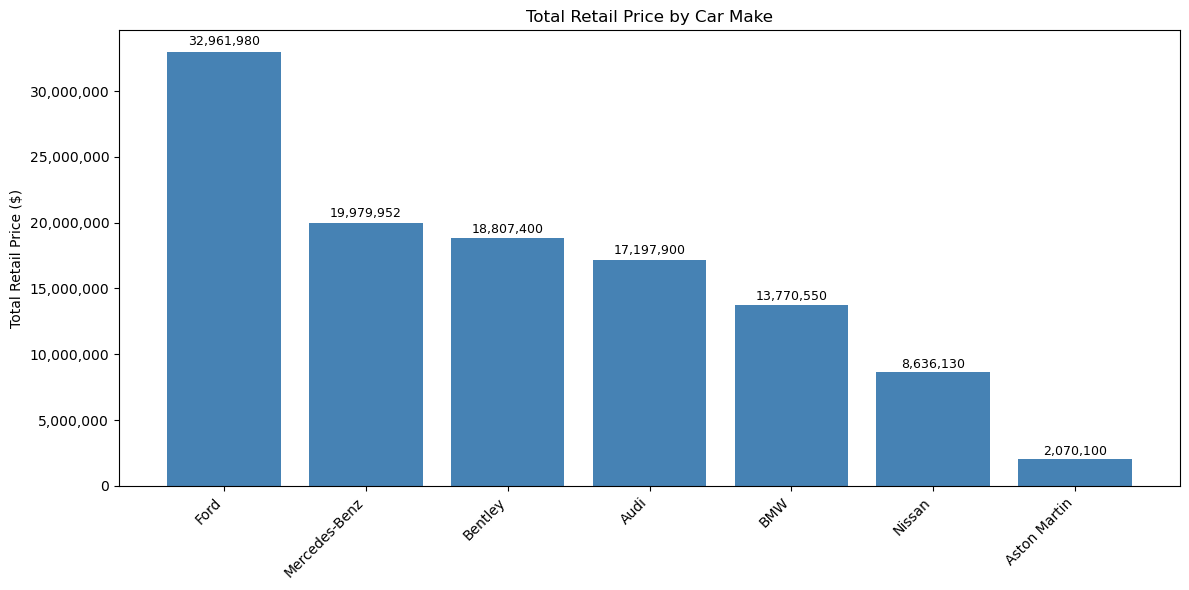

In [196]:
mp=car_df.groupby(['Make'],as_index=False).agg({'Retail_Price':'sum'}).sort_values('Retail_Price', ascending=False)


plt.figure(figsize=(12,6))
bars = plt.bar(mp['Make'], mp['Retail_Price'], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.ylabel('Total Retail Price ($)')
plt.title('Total Retail Price by Car Make')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + yval*0.01,
             format(int(yval), ','),  # binlik ayraçlı yazı
             ha='center',
             va='bottom',
             fontsize=9)

plt.tight_layout()
plt.show()

2. Which model has the highest Invoice Price combined for 2023 and 2024 ?

In [271]:
ip=car_df[car_df['Year'].isin([2024 ,2023])]
ip2=ip.groupby('Model',as_index=False).agg({'Retail_Price':'sum'}).sort_values('Retail_Price',ascending=False)
ip2.head(5)

,Model,Retail_Price
31,Continental,8572900
50,Flying Spur,5043400
48,F-350 Super Duty,4559695
114,Sprinter,4382750
119,Transit Cargo Van,4269000


3. Show the average retail_price per make for all FWD cars (Drivetrain) ?

In [291]:
filt=car_info[car_info['Drivetrain'] == 'FWD']
join1=pd.merge(car_df,filt, on ='index',how = 'left')
avg=join1.groupby('Make',as_index=False).agg({'Retail_Price':'mean'})
print(avg)

            Make   Retail_Price
0   Aston Martin  230011.111111
1           Audi   69627.125506
2            BMW   77362.640449
3        Bentley  272571.014493
4           Ford   53422.982172
5  Mercedes-Benz   83598.125523
6         Nissan   43180.650000


4. Show the min and max Used prices per make where the year is 2024 ?

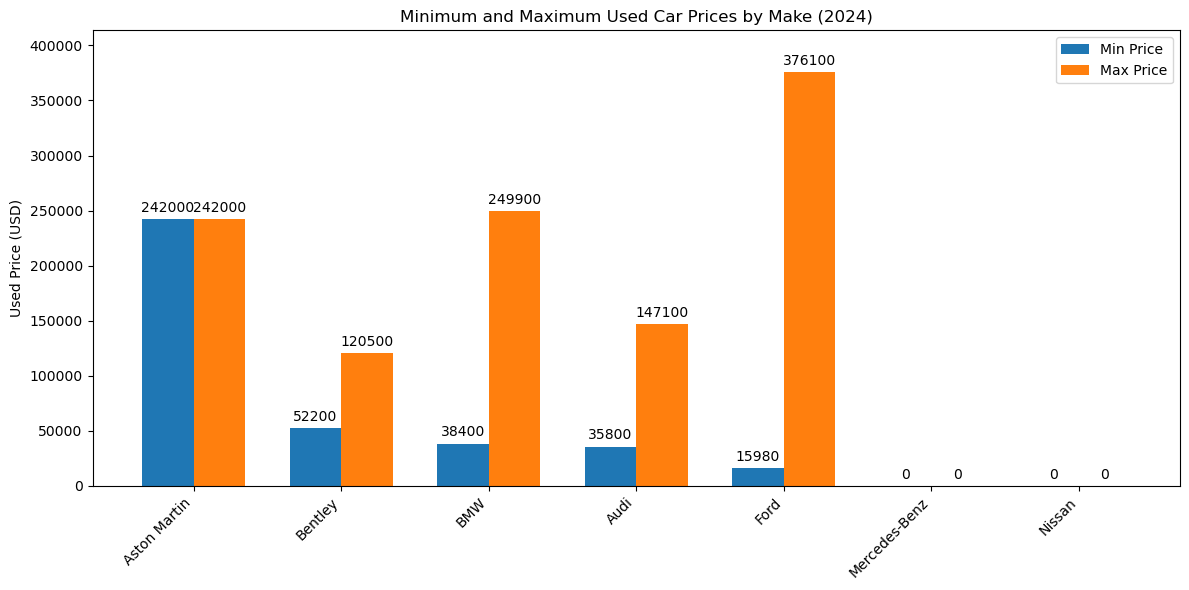

In [368]:
filt1=pd.merge(car_df,car_prices,on='index',how='left')
filt2=filt1[filt1['Year'] ==2024].groupby('Make',as_index=False).agg(Min_Price=('Used Price','min'),
                                                                     Max_Price=('Used Price','max')).sort_values('Min_Price',ascending=False)
filt2['Min_Price']=filt2['Min_Price'].fillna(0).astype(int)
filt2['Max_Price']=filt2['Max_Price'].fillna(0).astype(int)
filt2

# X-axis labels (brands)
makes = filt2['Make']
x = np.arange(len(makes))  # location of labels
width = 0.35  

# Y-axis datas
min_prices = filt2['Min_Price']
max_prices = filt2['Max_Price']


fig, ax = plt.subplots(figsize=(12, 6))

# Bars
rects1 = ax.bar(x - width/2, min_prices, width, label='Min Price')
rects2 = ax.bar(x + width/2, max_prices, width, label='Max Price')

# Bar marks
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# Tag to axis
ax.set_ylabel('Used Price (USD)')
ax.set_title('Minimum and Maximum Used Car Prices by Make (2024)')
ax.set_xticks(x)
ax.set_xticklabels(makes, rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, filt2['Max_Price'].max() * 1.1)

plt.tight_layout()
plt.show()

5.Show the Model with the lowest Highway_fuel_economy

In [425]:
car_info['Highway_fuel_economy_value']=car_info['Highway Fuel Economy'].str.extract(r'(\d+\.?\d*)').astype(float)

In [405]:
join2=pd.merge(car_df,car_info ,on ='index' how='left')

In [421]:
lowest=join2[['Model','Highway_fuel_economy_value']].sort_values('Highway_fuel_economy_value')
lowest.head(1)

,Model,Highway_fuel_economy_value
1373,G-Class,12.0
